# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **Column names**: 
<br>
1. PationtId: Identification of a patient 
<br>
2. AppointmentID: Identification of each appointment
<br>
3. Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
<br>
4. ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
<br>
5. AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.
<br>
6. Age: How old is the patient.
<br>
7. Neighbourhood: Where the appointment takes place.
<br>
8. Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program
<br>
9. Hipertension
<br>
10. Diabetes
<br>
11. Alcoholism
<br>
12. Handcap
<br>
13. SMS_received
<br>
14. No-show


### Research questions

<br>
- What is the overall appointment show-up vs. no show-up rate?
<br>
- Do SMS notifications coincide with fewer no shows?
<br>
- Do some days of the week have more no shows than others?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df=pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling
#### General Properties
The Pandas library will be used to work with the data. The following commands will low that dataset into a pandas dataframe and display basic information about it.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [43]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### General Observations
The dataset has 14 colums and 110.527 rows, no duplicates.
<br>
**Data types**<br>
- The types of ScheduledDay and Appointmentday need converted to DateTime<br>
- The types of colums Scholarschip till No-show need to be inspected and ideally converted to boolean for more precise value definition and easier handling.<br>

**Values and Distribution**<br>
- No missing values, since each column has 110.527 values.
- With min values of 0 and max values of 1 the columns Scholarship, Hipertension, Diaetes, Alcoholism and SMS_received are dichotomous.

- To answer the research questions, the columns PatiendID and AppointmentID do not seem necessary and will therefore be dropped.
- The min value -1 of the Age-colum seems odd and will therefore be inspected. The max value is quite high. Although realistic, it is worth a closer look


### Data Cleaning
**check for duplicate**

In [44]:
sum(df.duplicated())

0

**Check age values**

In [45]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [46]:
df.drop(df[df['Age'] == -1].index, inplace = True)

In [47]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

**Change column name**

In [48]:
new_labels = ['patient_id','appointment_id','gender','schedul_day', 'appointment_day','age',
              'neibourhood','scholarship', 'hipertension','diabetes','alcoholism','handcap','SMS','show']
df.columns = new_labels
df.head()

,patient_id,appointment_id,gender,schedul_day,appointment_day,age,neibourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**To answer the research questions, the columns PatiendID and AppointmentID do not seem necessary and will therefore be dropped.**

In [49]:
df.drop(['patient_id','appointment_id','appointment_day'], axis=1, inplace= True)

In [50]:
df['schedul_day'] = pd.to_datetime(df['schedul_day'])
df

,gender,schedul_day,age,neibourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS,show
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25,19,CONQUISTA,0,0,0,0,0,0,No


**convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby**

In [51]:
df.replace(['No','Yes'],[1,0], inplace=True)
df

,gender,schedul_day,age,neibourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS,show
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27 15:05:12,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29 08:02:16,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27 12:48:25,19,CONQUISTA,0,0,0,0,0,0,1


**Convert the schedul_day to datetime format**

In [52]:
df['schedul_day'] = pd.to_datetime(df['schedul_day'])

In [53]:
# extract day and day of week from Start Time to create new columns
df['day'] = df['schedul_day'].dt.day_name()
df

,gender,schedul_day,age,neibourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS,show,day
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday
5,F,2016-04-27 08:36:51,76,REPÚBLICA,0,1,0,0,0,0,1,Wednesday
6,F,2016-04-27 15:05:12,23,GOIABEIRAS,0,0,0,0,0,0,0,Wednesday
7,F,2016-04-27 15:39:58,39,GOIABEIRAS,0,0,0,0,0,0,0,Wednesday
8,F,2016-04-29 08:02:16,21,ANDORINHAS,0,0,0,0,0,0,1,Friday
9,F,2016-04-27 12:48:25,19,CONQUISTA,0,0,0,0,0,0,1,Wednesday


<a id='eda'></a>
## Exploratory Data Analysis
The main goal of this analysis is to find why patients miss their appointment. and this will be done by finding the relationships between the patients who missed and Attended their appointment and the other charactrestics in the dataset.
<br>
- What is the overall appointment show-up vs. no show-up rate?
<br>
- Do SMS notifications coincide with fewer no shows?
<br>
- Do some days of the week have more no shows than others?

**Exploring the missing appointment depends on the age**

In [54]:
# making masks to use later
miss = df["show"] == 0
show = df["show"] == 1

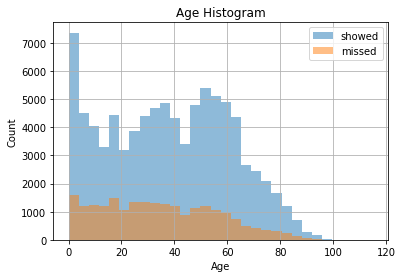

In [55]:
# histogram for ages of patients
df[show].age.hist(alpha=0.5, bins=30,label="showed")
df[miss].age.hist(alpha=0.5, bins=30,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

#### After some exploration we could say:
- patients from 12 to mid 30s are more likely to miss their appointments

**Exploring the missing appointment depends on the age**

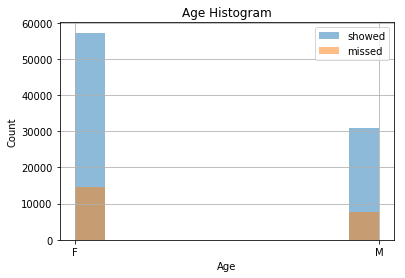

In [56]:
# histogram for ages of patients
df[show].gender.hist(alpha=0.5, bins=10,label="showed")
df[miss].gender.hist(alpha=0.5, bins=10,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

**The percentage of missing appointment in male is 25.8%, while women is 25.8% so according to data miss appointment had nothing to do with gender**

### Research Question 1: what is the overall appointment show-up vs. no show-up rate?

79.8065613521


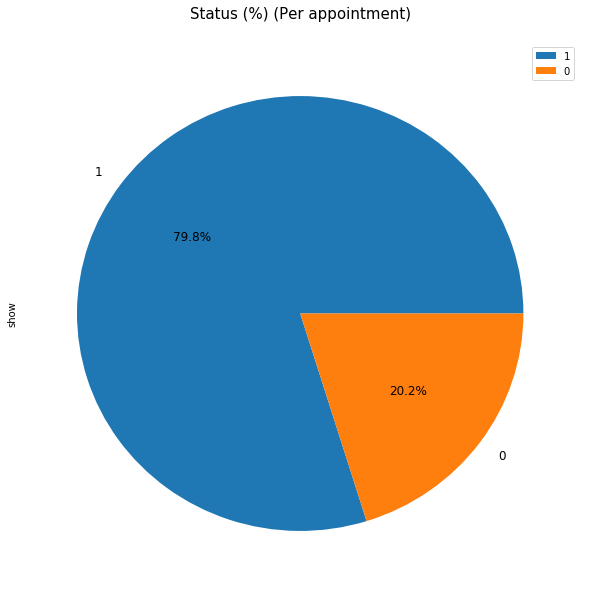

In [57]:
yes_no = {1:'Yes', 0:'No'}
allP = df['show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

**Just over 20% of all appointments resulted in no shows.**

### Research Question 2 : Are SMS notifications associated with lowered incidences of No Shows?

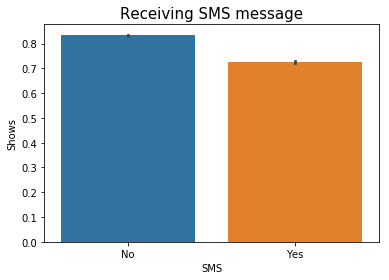

In [58]:
# this dictionary will be used to map 1s and 0s to Yeses and Nos
yes_no = {1:'Yes', 0:'No'}

# bar plot the percentage of noshows for each sms condition
ax = sns.barplot(x=df.SMS.map(yes_no), y=df.show)
ax.set_title("Receiving SMS message", fontsize = 15);
ax.set_ylabel('Shows')
plt.legend();

**Suprisingly, the percentage of no shows is much higher when SMS messages were received.**

### Research Question 3: Are there more No Shows on some days of the week?

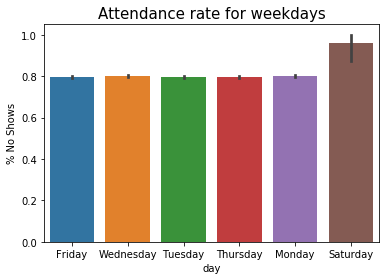

In [59]:
# Ploot the average no shows for each day of the week.
ax = sns.barplot(x=df.day, y=df.show)
ax.set_title("Attendance rate for weekdays", fontsize = 15);
ax.set(ylabel='% No Shows')
plt.show()

**There appear to be higher incidences of no shows on Saturdays and Fridays.**

<a id='conclusions'></a>
## Conclusions

- certain days of the week were linked to higher occurances of no shows. However, the relationship between SMS_received and No Shows was contrary to what was expected. And as is always the case, it is important to remember that correlation does not imply causation.


## Limitations:
- One limitation of this analysis was the lack of background information. 
- There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.
- The Handcap and SMS_received columns weren't explained clearly on the dataset page.
- The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0